In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Dataset Loading
# from .utils import move_dataset_detection
from pathlib import Path
from roboflow import Roboflow

#Scripts/utils.py
import os
import pandas as pd
import shutil

#model/utils.py
import torch
from matplotlib import pyplot as plt

#model/detection/train.py
import os

import torch

import torch.nn.functional as F

from torch.utils.data import DataLoader
from pathlib import Path

# from .utils import collate_fn, CarDataset, Averager, load_dataset, training_model
# from .model import build_model_object_detection
# from ..utils import plot_loss_history

#model/detection/utils.py
import json
import pandas as pd
import numpy as np
import cv2

import torch
from torch.utils.data import Dataset

# from ..utils import save_model, writing_training_logs

#model/detection/model.py
import torchvision
from torchvision.models.detection.faster_rcnn import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

#model/detection/eval.py
from pathlib import Path
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

# from submission.model.detection.utils import CarDataset, collate_fn, Averager
# from submission.model.detection.model import build_model_object_detection
# from ..utils import load_model
# from .utils import loss_epoch, load_dataset

### Scripts/utils.py

In [ ]:
def move_dataset_detection(source_folder, destination_folder, remove=False):
    """
    Moves specified folders from the source directory to the destination directory.
    Args:
        source_folder (str): The path to the source directory containing the dataset.
        destination_folder (str): The path to the destination directory where folders will be copied.
        remove (bool): If True, removes the source directory after copying. Default is False.
    """
    source_dir = source_folder
    destination_dir = destination_folder

    # Define the folders to copy
    folders_to_copy = ['test', 'train', 'valid']

    print(f"Contents of the downloaded directory: {source_dir}")
    try:
        print(os.listdir(source_dir))
    except FileNotFoundError:
        print(f"Error: The source directory {source_dir} was not found.")


    # Copy each folder
    for folder in folders_to_copy:
        source_folder_path = os.path.join(source_dir, folder)
        destination_folder_path = os.path.join(destination_dir, folder)
        print(f"Copying {source_folder_path} to {destination_folder_path}")
        try:
            shutil.copytree(source_folder_path, destination_folder_path, dirs_exist_ok=True)
        except FileNotFoundError:
            print(f"Error: Source folder {source_folder_path} not found. Please check the directory structure of the downloaded dataset.")


    print("Finished copying specified folders.")

    # Delete the source folder
    # Remove the source directory and its contents
    
    if remove:
        if os.path.exists(source_dir):
            print(f"Removing source directory: {source_dir}")
            shutil.rmtree(source_dir)
            print(f"Source directory {source_dir} removed successfully.")
        else:
            print(f"Source directory {source_dir} does not exist. No action needed.")

### model/utils.py

In [ ]:
def save_model(model, path_to_save):
    """
    Save the model weights to the specified path.
    
    Args:
        model: The trained model.
        path_to_save: Path to save the model weights.
    """
    torch.save(model.state_dict(), path_to_save)
    print(f"Model weights saved to {path_to_save}")

def load_model(model, path_load_from, device):
    """
    Save the model weights to the specified path.
    
    Args:
        model: The trained model.
        path_to_save: Path to save the model weights.
    """
    # path_load_from = '/content/best_model_weights.pth'
    model.load_state_dict(torch.load(path_load_from, map_location=device))
    print(f"Model weights loaded successfully from {path_load_from}")

def writing_training_logs(path_to_save, message):
    """
    Write training logs to a file.
    
    Args:
        path_to_save: Path to save the training logs.
        message: Message to write in the log file.
    """
    with open(f'{path_to_save}', 'a') as f:
        f.write(message + '\n')
    print(message)

def plot_loss_history(loss_history, path_to_save):
    """
    Plot the training and validation loss history.
    
    Args:
        loss_history: Dictionary containing training and validation loss history.
        path_to_save: Path to save the plot.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(loss_history['train'], label='Training Loss')
    plt.plot(loss_history['val'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss History')
    plt.legend()
    plt.grid()
    plt.savefig(f'{path_to_save}/loss_history.png')
    plt.show()

def plot_metric_history(metric_history, path_to_save):
    """
    Plot the training and validation metric history.
    
    Args:
        metric_history: Dictionary containing training and validation metric history.
        path_to_save: Path to save the plot.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(metric_history['train'], label='Training Metric')
    plt.plot(metric_history['val'], label='Validation Metric')
    plt.xlabel('Epochs')
    plt.ylabel('Metric')
    plt.title('Training and Validation Metric History')
    plt.legend()
    plt.grid()
    plt.savefig(f'{path_to_save}/metric_history.png')
    plt.show()

### model/detection/utils.py

In [ ]:
def filter_car_data(df_annot):
    """Filter the annotations DataFrame to include only car-related categories."""
    df_annot = df_annot[(df_annot['category_id'] == 3) | (df_annot['category_id'] == 6)]
    return df_annot

def read_annotation(dir_name, text_name):
    """Read annotations from a JSON file and return a DataFrame."""
    with open(f'{dir_name}/_annotations.coco.json', 'r') as file:
        data = json.load(file)
        df = pd.DataFrame(data[text_name])
    return df
  
def collate_fn(batch):
    """Collate function to combine a list of samples into a batch."""
    return tuple(zip(*batch))

def handle_bbox_format(df):
    """Handle the bounding box format in the DataFrame."""
    splited_bbox = df['bbox'].apply(pd.Series)
    #change columns
    splited_bbox.columns =['x','y','w','h']
    df = pd.concat([df,splited_bbox], axis=1)

    df = df.drop(['bbox','segmentation'], axis=1)
    df['x'] = df['x'].astype(np.float64)
    df['y'] = df['y'].astype(np.float64)
    df['w'] = df['w'].astype(np.float64)
    df['h'] = df['h'].astype(np.float64)

    return df

def load_dataset(dir_name):
    """Load the dataset from the specified directory."""
    df_categories = read_annotation(dir_name, 'categories')
    df_images = read_annotation(dir_name, 'images')
    df_annot = read_annotation(dir_name, 'annotations')

    df_annot = handle_bbox_format(df_annot)
    df_annot_filter = filter_car_data(df_annot)

    return df_images, df_annot_filter

class CarDataset(Dataset):

    def __init__(self, dataframe_image, dataframe_annot, image_dir, transforms=None):
        super().__init__()

        self.image_ids = dataframe_annot['image_id'].unique()
        self.df_image = dataframe_image
        self.df_annot = dataframe_annot
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        # file_name = self.df_image[self.df_image['id'] == image_id]['file_name'].item()
        file_name = self.df_image[self.df_image['id'] == image_id]['file_name'].iloc[0]

        # Get all the bbox records for the current image_id
        records = self.df_annot[self.df_annot['image_id'] == image_id]

        # Read the image, and convert it to RGB format
        # Normalize the image to [0, 1] range
        image = cv2.imread(f'{self.image_dir}/{file_name}', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0


        #Change the bboxe format from xywh to xyxy
        boxes = records[['x', 'y', 'w', 'h']].values
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]

        # Calculate the area of the bounding boxes
        # area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = records['area'].values
        area = torch.as_tensor(area, dtype=torch.float32)

        # there is only one class
        # set the labels to 1 for each bounding box
        # records.shape[0] gives the number of bounding boxes for each image
        labels = torch.ones((records.shape[0],), dtype=torch.int64)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']

            # Ensure transformed boxes are correctly handled and converted back to a tensor
            # We need to convert this back to a tensor of shape (N, 4)
            if sample['bboxes']: # Check if bboxes is not empty
                target['boxes'] = torch.tensor(sample['bboxes'], dtype=torch.float32)
                target['labels'] = torch.tensor(sample['labels'], dtype=torch.int64)

            else:
                # Handle cases where transforms might result in no bounding boxes
                target['boxes'] = torch.empty((0, 4), dtype=torch.float32)
                target['labels'] = torch.empty((0,), dtype=torch.int64)
                target['area'] = torch.empty((0,), dtype=torch.float32)
                target['iscrowd'] = torch.empty((0,), dtype=torch.int64)

        return image, target, image_id

    def __len__(self) -> int:
        return self.image_ids.shape[0]

class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

def loss_epoch(process_name="Training", 
               loss_tracker=None,
               data_loader=None,
               model=None,
               optimizer=None,
               device=None,
               path_to_save=None):
    """
    Function to compute the loss for a single epoch.
    Args:
        process_name (str): Name of the process, either "Training" or "Validation".
        loss_tracker (Averager): Tracker to accumulate loss values.
        data_loader (DataLoader): DataLoader for the dataset.   
        model (torch.nn.Module): The model to compute the loss.
        optimizer (torch.optim.Optimizer): Optimizer for the model.
        device (torch.device): Device to run the model on (CPU or GPU).
        path_to_save (str): Path to save the training logs.
    Returns:
        loss_value (float): The average loss value for the epoch.
    """
    
    if path_to_save is not None:
        path_batches_logs = f'{path_to_save}/training_history/{process_name.lower()}_loss_batches.txt'
    
    for itr, (images, targets, image_ids) in enumerate(data_loader):
        images = [torch.from_numpy(image).permute(2, 0, 1).to(device) for image in images]
        targets = [{k: torch.as_tensor(v).to(device) if isinstance(v, np.ndarray) else v.to(device) if hasattr(v, 'to') else v
        for k, v in t.items()} for t in targets]

        # Updated  
        if process_name != "Training":
            with torch.no_grad():
                model.train()  # Set the model in training mode to compute the loss
                loss_dict = model(images, targets)

                model.eval() # Set the model to evaluation mode after computing the loss
        else:
            model.train() # Set training mode for the model to compute the loss
            loss_dict = model(images, targets)
        
        if isinstance(loss_dict, dict):
            losses = sum(loss for loss in loss_dict.values())
            loss_value = losses.item()
            loss_tracker.send(loss_value)

            #Only run this when training
            if process_name == "Training":
                optimizer.zero_grad()
                losses.backward()
                optimizer.step()

                # Clear CUDA cache to help free up memory
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

            # TODO : CREATE A FUNCTION TO LOGS THE TRAINING LOGS
            if (itr + 1) % 50 == 0:
                print(f"{process_name} Iteration #{(itr + 1)} loss: {loss_value}")
                if path_to_save is not None:
                    writing_training_logs(f'{path_batches_logs}', 
                                      f"Iteration #{(itr + 1)} loss: {loss_value:.4f}")
    
    #Loss value after processing all batches
    loss_value = loss_tracker.value

    return loss_value

def training_model(train_data_loader,
                   training_loss_tracker,
                   valid_data_loader,
                   validation_loss_tracker,
                   model,
                   optimizer,
                   device,
                   num_epochs,
                   lr_scheduler=None,
                   path_to_save=None):
    """
    Function to train the model for a specified number of epochs.
    Args:
        train_data_loader (DataLoader): DataLoader for the training dataset.
        training_loss_tracker (Averager): Tracker to accumulate training loss values.
        valid_data_loader (DataLoader): DataLoader for the validation dataset.
        validation_loss_tracker (Averager): Tracker to accumulate validation loss values.
        model (torch.nn.Module): The model to be trained.
        optimizer (torch.optim.Optimizer): Optimizer for the model.
        device (torch.device): Device to run the model on (CPU or GPU).
        num_epochs (int): Number of epochs to train the model.
        lr_scheduler (torch.optim.lr_scheduler, optional): Learning rate scheduler. Defaults to None.
        path_to_save (str, optional): Path to save training logs and best model weights. Defaults to None.
    Returns:
        loss_history (dict): Dictionary containing training and validation loss history.
    """
    loss_history = {"train": [], "val": []}  # history of loss values in each epoch

    best_validation_loss = float('inf')  # Initialize best validation loss to a large value

    path_training_logs = f'{path_to_save}/training_history/training_logs.txt'
    path_best_model = f'{path_to_save}/best_model/best_model_weights.pth'

    for epoch in range(num_epochs):
        training_loss_tracker.reset() # Reset the loss tracker for each epoch
        validation_loss_tracker.reset() # Reset the validation loss tracker for each epoch

        #path_to_save = root_dir + '/logs/detection'
        writing_training_logs(f'{path_training_logs}', 
                              f"Starting Epoch #{epoch+1}...")
        print(f"Starting training for Epoch #{epoch+1}...")

        training_loss = loss_epoch(
            process_name="Training", 
            loss_tracker=training_loss_tracker,
            data_loader=train_data_loader,
            model=model,
            optimizer=optimizer,
            device=device,
            path_to_save=path_to_save
        )

        # update the learning rate
        if lr_scheduler is not None:
            lr_scheduler.step()
        
        loss_history["train"].append(training_loss)

        print(f"Epoch #{epoch+1} Training loss: {training_loss}")
        writing_training_logs(f'{path_training_logs}', 
                              f"Epoch #{epoch+1} Training loss: {training_loss:.4f}")
        
        # VALIDATION PHASE PART
        writing_training_logs(f'{path_training_logs}', 
                              f"Start validation for Epoch #{epoch+1}...")
        print(f"Starting validation for Epoch #{epoch+1}...")

        val_loss = loss_epoch(
            process_name="Validation", 
            loss_tracker=validation_loss_tracker,
            data_loader=valid_data_loader,
            model=model,
            optimizer=None,
            device=device,
            path_to_save=path_to_save
        )
        loss_history["val"].append(val_loss)
        
        writing_training_logs(f'{path_training_logs}',
                              f"Epoch #{epoch+1} Validation loss: {val_loss:.4f}")
        
        if val_loss < best_validation_loss:
            best_validation_loss = val_loss 
            writing_training_logs(f'{path_training_logs}',
                                  f"New best validation loss: {best_validation_loss:.4f} at epoch #{epoch+1}. Saving model...")
            print(f"New best validation loss: {best_validation_loss:.4f} at epoch #{epoch+1}. Saving model...")
            
            # Save the model weights
            save_model(model, f"{path_best_model}")
            writing_training_logs(f'{path_training_logs}',
                                  f"Model weights saved to {path_best_model}")

        writing_training_logs(f'{path_training_logs}',
                                f"Finished Training.")
        print(f"Training logs can be found at {path_training_logs}")
        print(f"Best Weight Model can be found at {path_best_model}")
    return loss_history

### model/detection/model.py


In [ ]:
def build_model_object_detection(backbone='resnet50', num_class=2, use_pretrained=True):
    # 1. Create the same backbone used in the pretrained model
    # This will create resnet50 with FPN (Feature Pyramid Network)
    backbone = resnet_fpn_backbone('resnet50', pretrained=True)

    # 2. Define AnchorGenerator (same as default)
    # Correct the aspect_ratios to match the default pretrained model's RPN head expectation.
    # The default config uses 3 aspect ratios per spatial location.
    anchor_generator = AnchorGenerator(
      sizes=((32,), (64,), (128,), (256,), (512,)),
      aspect_ratios=((0.5, 1.0, 2.0),) * 5
    )

    # 3. Define ROI Pooler (same as in torchvision)
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(
      featmap_names=['0', '1', '2', '3'], # The default resnet_fpn_backbone returns 5 feature maps (p2, p3, p4, p5, p6).
                                              # Check the return_layers of the default backbone.
                                              # Looking at resnet_fpn_backbone source, it returns {"0": p2, "1": p3, "2": p4, "3": p5, "4": p6}.
                                              # So we need 5 feature map names.
      output_size=7,
      sampling_ratio=2
    )

    # 4. Assemble the Faster R-CNN model
    model = FasterRCNN(
      backbone=backbone,
      num_classes=num_class,  # use 2 for our case, car and background
      rpn_anchor_generator=anchor_generator,
      box_roi_pool=roi_pooler
    )

    if use_pretrained:

        pretrained_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

        pretrained_dict = pretrained_model.state_dict()
        model_dict = model.state_dict()

        #Filtered the last layer, because the difference number of class
        filtered_dict = {
            k: v for k, v in pretrained_dict.items()
            if k in model_dict and not k.startswith('roi_heads.box_predictor')
        }
        model.load_state_dict(filtered_dict, strict=False)

    return model

## Main Code

In [7]:
project_dir = os.getcwd()
print(project_dir)

/content


### Scripts/download_data_detection.py

In [ ]:
# current_file_path = Path(__file__)
# project_dir = current_file_path.parent.parent

# Replace with your actual API key
rf = Roboflow(api_key="<PUT_YOUR_ROBOFLOW_API_KEY_HERE>")

# Replace with your workspace and project names
project = rf.workspace("dallmeier").project("labelchangetest")

# Replace with the desired version number
version = project.version(1)

# Define the directory where you want to download the dataset
# download_dir = f"{root_dir}/data/detection/" # You can change this to your desired path
dataset = version.download("coco")



source_dir = f"{project_dir}/LabelChangeTest-1"
destination_dir = f"{project_dir}/data/detection"
move_dataset_detection(source_dir, destination_dir, remove=True)

print(f"Dataset downloaded to: {destination_dir}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LabelChangeTest-1 in coco:: 100%|██████████| 908/908 [00:00<00:00, 4752.19it/s]


Contents of the downloaded directory: /content/LabelChangeTest-1
['README.dataset.txt', 'README.roboflow.txt', 'train', 'test', 'valid']
Copying /content/LabelChangeTest-1/test to /content/data/detection/test
Copying /content/LabelChangeTest-1/train to /content/data/detection/train
Copying /content/LabelChangeTest-1/valid to /content/data/detection/valid
Finished copying specified folders.
Removing source directory: /content/LabelChangeTest-1
Source directory /content/LabelChangeTest-1 removed successfully.
Dataset downloaded to: /content/data/detection


### model/detection/train.py

Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 173MB/s]


Streaming output truncated to the last 5000 lines.
Iteration #147 loss: 0.0485
Iteration #148 loss: 0.0291
Iteration #149 loss: 0.0237
Iteration #150 loss: 0.0447
Training Iteration #150 loss: 0.04468454417587357
Iteration #151 loss: 0.0643
Iteration #152 loss: 0.0627
Iteration #153 loss: 0.0351
Iteration #154 loss: 0.0551
Iteration #155 loss: 0.1440
Iteration #156 loss: 0.0407
Iteration #157 loss: 0.0336
Iteration #158 loss: 0.0540
Iteration #159 loss: 0.0349
Iteration #160 loss: 0.0389
Iteration #161 loss: 0.0393
Iteration #162 loss: 0.0246
Iteration #163 loss: 0.0377
Iteration #164 loss: 0.0349
Iteration #165 loss: 0.0312
Iteration #166 loss: 0.0922
Iteration #167 loss: 0.0239
Iteration #168 loss: 0.0781
Iteration #169 loss: 0.1003
Iteration #170 loss: 0.0418
Iteration #171 loss: 0.0479
Iteration #172 loss: 0.0496
Iteration #173 loss: 0.0187
Iteration #174 loss: 0.0866
Iteration #175 loss: 0.0169
Iteration #176 loss: 0.0788
Iteration #177 loss: 0.0481
Iteration #178 loss: 0.0456
Ite

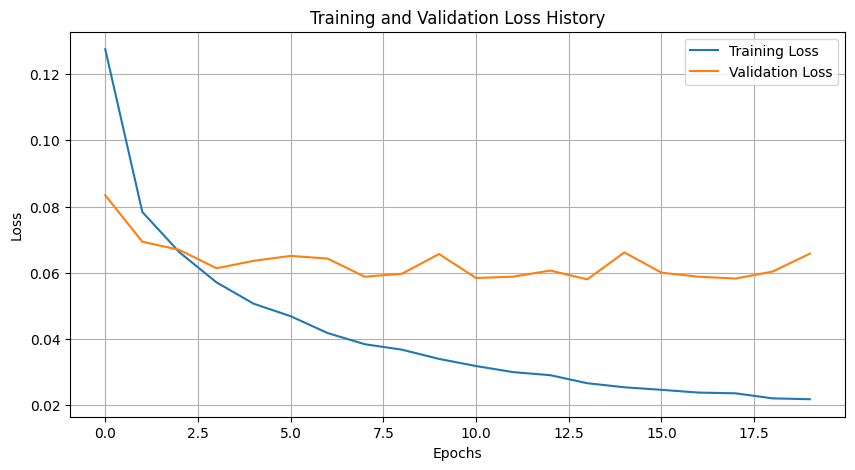

In [9]:
# current_file_path = Path(__file__)
# project_dir = current_file_path.parent.parent.parent

DIR_TRAIN = f"{project_dir}/data/detection/train"
DIR_VALID = f"{project_dir}/data/detection/valid"

# Dataset Preparation

df_images_train, df_annot_train_filter  = load_dataset(DIR_TRAIN)
df_images_valid, df_annot_valid_filter = load_dataset(DIR_VALID)

train_dataset = CarDataset(df_images_train, df_annot_train_filter, DIR_TRAIN, None)
valid_dataset = CarDataset(df_images_valid, df_annot_valid_filter, DIR_VALID, None)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True,
    num_workers=2,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=8,
    shuffle=False,
    num_workers=2,
    collate_fn=collate_fn
)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Training the model
model = build_model_object_detection(backbone='resnet50', num_class=2, use_pretrained=True)

model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
lr_scheduler = None
num_epochs = 20

# Create directories for saving logs and best model if they don't exist
logs_dir = f"{project_dir}/logs/detection"
training_history_dir = f"{logs_dir}/training_history"
best_model_dir = f"{logs_dir}/best_model"

os.makedirs(logs_dir, exist_ok=True)
os.makedirs(training_history_dir, exist_ok=True)
os.makedirs(best_model_dir, exist_ok=True)

print(f"Ensured directories exist: {training_history_dir}, {best_model_dir}")

training_loss_tracker = Averager()
validation_loss_tracker = Averager()

loss_history = training_model(train_data_loader,
                   training_loss_tracker,
                   valid_data_loader,
                   validation_loss_tracker,
                   model,
                   optimizer,
                   device,
                   num_epochs,
                   lr_scheduler=lr_scheduler,
                   path_to_save=logs_dir)

plot_loss_history(loss_history, training_history_dir)

### model/detection/eval.py

In [10]:
import numpy as np

from pathlib import Path

import torch

import torch.nn.functional as F

from torch.utils.data import DataLoader

# from submission.model.detection.utils import CarDataset, collate_fn, Averager
# from submission.model.detection.model import build_model_object_detection
# from ..utils import load_model
# from .utils import loss_epoch, load_dataset

In [ ]:
DIR_TEST = f"{project_dir}/data/detection/test"

df_images_test, df_annot_test_filter  = load_dataset(DIR_TEST)

test_dataset = CarDataset(df_images_test, df_annot_test_filter, DIR_TEST, None)

test_data_loader = DataLoader(
    test_dataset,
    batch_size=8,
    shuffle=False,
    num_workers=2,
    collate_fn=collate_fn
)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = build_model_object_detection(backbone='resnet50', num_class=2, use_pretrained=False)
model_save_path = f'{project_dir}/logs/detection/best_model/best_model_weights.pth'
load_model(model, model_save_path, device)
model.to(device)

print(f"Model weights loaded successfully from {model_save_path}")

test_loss_tracker = Averager()

test_loss = loss_epoch(process_name="Testing",
                       loss_tracker=test_loss_tracker, 
                       data_loader=test_data_loader, 
                       model = model,
                       optimizer=None,
                       device=device, 
                       path_to_save=None
                    )
print(f"Test Loss: {test_loss}")

Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


Model weights loaded successfully from /content/logs/detection/best_model/best_model_weights.pth
Model weights loaded successfully from /content/logs/detection/best_model/best_model_weights.pth
Test Loss: 0.07784749371191242
